<a href="https://colab.research.google.com/github/psgareja/Complete-Python-3-Bootcamp/blob/master/googlestockpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import files

In [0]:
uploaded=files.upload()

Saving Google_Stock_Price_Test.csv to Google_Stock_Price_Test.csv


In [0]:
#import the data set

In [0]:
uploaded=files.upload()

Saving Google_Stock_Price_Train.csv to Google_Stock_Price_Train.csv


In [0]:
#importing the trainig set

In [0]:
trainig_set=pd.read_csv('Google_Stock_Price_Train.csv')

In [0]:
trainig_set.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
trainig_set=trainig_set.iloc[:,1:2].values

In [0]:
trainig_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
sc=MinMaxScaler()

In [0]:
trainig_set=sc.fit_transform(trainig_set)

In [0]:
x_train=trainig_set[0:1257]

In [0]:
y_train=trainig_set[1:1258]

In [0]:
x_train=np.reshape(x_train,(1257,1,1))

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


Using TensorFlow backend.


In [0]:
regressor=Sequential()

In [0]:
regressor.add(LSTM(units=4,activation='sigmoid',input_shape=(None,1)))

In [0]:
regressor.add(Dense(units=1))

In [0]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [0]:
regressor.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 3s 2ms/step - loss: 0.1865
Epoch 2/200
1257/1257 [==============================] - 0s 282us/step - loss: 0.1293
Epoch 3/200
1257/1257 [==============================] - 0s 275us/step - loss: 0.0959
Epoch 4/200
1257/1257 [==============================] - 0s 276us/step - loss: 0.0784
Epoch 5/200
1257/1257 [==============================] - 0s 266us/step - loss: 0.0703
Epoch 6/200
1257/1257 [==============================] - 0s 278us/step - loss: 0.0665
Epoch 7/200
1257/1257 [==============================] - 0s 284us/step - loss: 0.0644
Epoch 8/200
1257/1257 [==============================] - 0s 269us/step - loss: 0.0629
Epoch 9/200
1257/1257 [==============================] - 0s 287us/step - loss: 0.0616
Epoch 10/200
1257/1257 [==============================] - 0s 291us/step - loss: 0.0602
Epoch 11/200
1257/1257 [==============================] - 0s 279us/step - loss: 0.0587
Epoch 12/200
1257/1257 [==============================

In [0]:
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:, 1:2].values

In [0]:
inputs=real_stock_price
inputs=sc.transform(inputs)

In [0]:
inputs=np.reshape(inputs,(20,1,1))

In [0]:
predicted_stock_price=regressor.predict(inputs)

In [0]:
predicted_stock_price

array([[0.9284431 ],
       [0.94473773],
       [0.9408505 ],
       [0.9564917 ],
       [0.9754342 ],
       [0.97791374],
       [0.97305596],
       [0.976691  ],
       [0.9772686 ],
       [0.9765891 ],
       [0.974432  ],
       [0.9732599 ],
       [0.9763004 ],
       [0.9768778 ],
       [1.0023987 ],
       [1.0147842 ],
       [1.0286212 ],
       [1.0233865 ],
       [0.9894528 ],
       [0.959215  ]], dtype=float32)

In [0]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [0]:
predicted_stock_price

array([[778.2138 ],
       [786.9732 ],
       [784.88354],
       [793.2917 ],
       [803.47437],
       [804.8073 ],
       [802.1959 ],
       [804.14996],
       [804.46045],
       [804.0952 ],
       [802.9356 ],
       [802.3056 ],
       [803.94006],
       [804.2504 ],
       [817.9694 ],
       [824.6274 ],
       [832.0656 ],
       [829.2516 ],
       [811.01025],
       [794.7556 ]], dtype=float32)

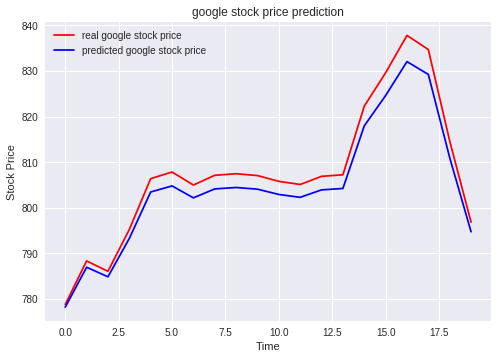

In [0]:
plt.plot(real_stock_price,color='red',label='real google stock price')
plt.plot(predicted_stock_price,color='blue',label='predicted google stock price')
plt.title('google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()